In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, f1_score, precision_score, average_precision_score,  recall_score,  precision_recall_curve

In [3]:
credit_card_data = pd.read_csv('/content/sample_data/creditcard.csv')

In [4]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
credit_card_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
credit_card_data['Class'].unique()

array([0, 1])

In [11]:
credit_card_data.shape

(284807, 31)

In [12]:
fraud = credit_card_data[credit_card_data['Class'] == 1]
normal = credit_card_data[credit_card_data['Class'] == 0]
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [13]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
normal['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
credit_card_data_sample = credit_card_data.sample(frac = 0.1,random_state=1)
credit_card_data_sample.shape

(28481, 31)

In [16]:
fraud = credit_card_data_sample[credit_card_data_sample['Class'] == 1]
true = credit_card_data_sample[credit_card_data_sample['Class'] == 0]
outlier_fraction = len(fraud) / float(len(true))
print(outlier_fraction)
print("fraud cases : {}".format(len(fraud)))
print("true cases : {}".format(len(true)))

0.0017234102419808666
fraud cases : 49
true cases : 28432


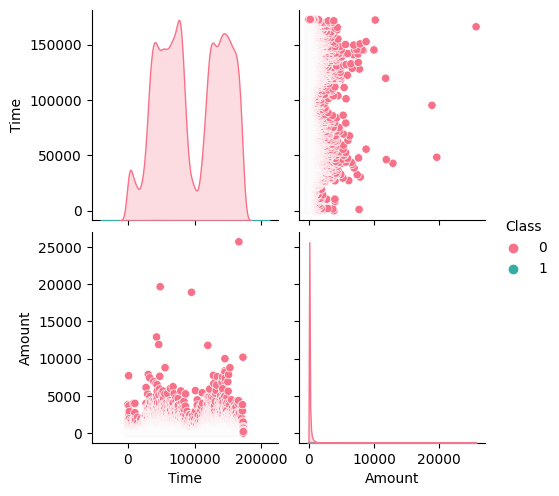

In [17]:
sns.pairplot(credit_card_data, hue='Class',vars=['Time','Amount'], palette='husl')

In [18]:
x = credit_card_data.drop('Class',axis=1)
y= credit_card_data['Class']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [20]:
rfc = RandomForestClassifier()
rfc

RandomForestClassifier()

In [21]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [22]:
y_pred = rfc.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
def print_scores(y_test, y_pred):
    print(f'Accuracy  :{accuracy_score(y_test, y_pred):.2f}' )
    print(f'Balanced  :{balanced_accuracy_score(y_test, y_pred):.2f}' )
    print(f'F1        :{f1_score(y_test, y_pred):.2f}' )
    print(f'Precision :{precision_score(y_test, y_pred):.2f}' )
    print(f'Recall    :{recall_score(y_test, y_pred):.2f}' )
print_scores(y_test, y_pred)

Accuracy  :1.00
Balanced  :0.90
F1        :0.85
Precision :0.92
Recall    :0.79


In [24]:
lr = LogisticRegression()
lr

LogisticRegression()

In [25]:
s1 =SFS(lr,k_features=10, forward=True, scoring='accuracy')
s1

SequentialFeatureSelector(estimator=LogisticRegression(), k_features=10,
                          scoring='accuracy')

In [ ]:
s1 = s1.fit(x_train, y_train)
s1

In [27]:
col_index = s1.k_feature_idx_
col_index = list(col_index)
col_index

[0, 1, 10, 12, 14, 19, 22, 24, 25, 27]

In [28]:
x_train = x_train.iloc[:, col_index]
x_train

,Time,V1,V10,V12,V14,V19,V22,V24,V25,V27
68806,53150.0,-1.115047,-0.816909,0.108177,-0.071934,1.956778,-0.539618,-0.774946,0.105868,0.229737
40018,40060.0,1.228473,-0.014495,0.833158,0.187845,0.500875,-0.574730,-0.303782,0.073315,-0.069178
250360,154865.0,1.926148,0.007083,0.317771,-0.098650,0.145642,-1.251300,-0.120530,-0.361515,0.052747
234820,148130.0,2.046232,-0.478188,0.036516,-0.705034,-0.504199,0.757245,-0.079318,0.234805,0.000028
10001,15014.0,-0.837077,0.889521,-2.533696,1.352159,1.371433,-0.458101,0.234167,-0.418734,-0.355165
...,...,...,...,...,...,...,...,...,...,...
211543,138459.0,-1.321976,-0.446486,-0.625697,1.105463,1.330776,-0.237503,-0.767844,-0.397162,-0.463125
86293,61167.0,-0.627810,-0.853181,0.899184,-0.461663,-0.905200,-0.004245,-0.964599,-0.522294,0.145939
122579,76616.0,1.512602,1.611424,-0.557701,0.125956,0.631084,-1.377240,-0.579511,0.297851,-0.001415
152315,97253.0,1.798863,0.470972,-3.441205,1.359234,0.495321,0.351358,-0.566188,-0.596200,-0.033616


In [ ]:
lr.fit(x_train, y_train)

In [30]:
x_test = x_test.iloc[:, col_index]
x_test

,Time,V1,V10,V12,V14,V19,V22,V24,V25,V27
183484,125821.0,-0.323334,-1.644401,0.202647,-1.802360,0.847262,-0.433890,-0.046651,0.211512,0.108494
255448,157235.0,-0.349718,-1.192404,-0.620458,-0.770837,-0.148099,-0.833209,0.490035,-0.404816,0.076830
244749,152471.0,-1.614711,-0.219013,-0.736771,0.348343,-1.578951,1.134489,0.640981,-1.801998,0.286285
63919,50927.0,-2.477184,0.133040,0.435125,0.278965,0.106228,0.692245,-0.260777,0.005183,-0.510060
11475,19899.0,1.338831,0.113386,-3.282511,1.252202,0.263854,-0.074719,0.333122,0.379087,-0.002769
...,...,...,...,...,...,...,...,...,...,...
236778,148949.0,-1.227033,-1.639968,-0.086285,0.247726,-0.739693,-0.293542,0.518298,0.858450,0.011475
127073,78200.0,1.250596,-0.090898,0.052143,0.349700,-0.276357,-0.580817,-0.429060,0.299309,-0.022217
208502,137149.0,1.125402,0.973563,-0.130742,1.193156,-0.434610,0.020985,-0.259110,0.272149,-0.240867
263323,160893.0,2.064857,-0.164642,0.811897,-0.453668,0.166812,0.422986,0.691878,0.354898,-0.103162


In [31]:
y_pred1 = lr.predict(x_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
accuracy_score(y_pred, y_test)

0.9995084442259752